#  Estados del Continuo del Hidrógeno

Darío Mitnik


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Estética
sp.init_printing()
%matplotlib inline

#Definimos los simbolos que vamos a usar.
r=sp.Symbol('r',positive=True)
l=sp.Symbol('l',positive=True,integer=True)
z=sp.Symbol('z',positive=True,integer=True)
k=sp.Symbol('k',positive=True)   # k en lugar de n 

In [2]:
# Función Radial Hidrogénica -- Estados del Continuo (con hipergeométricas)

def R_analytic(k,l,z,r):
    
    a = z/k # Parámetro de Sommerfeld
     
    # Generalización al campo complejo
    nj = 1j*a  
    rho = -2*1j*k*r
   
#    Los continuos se normalizan de otra forma
#    rnum = (2*z/nj)**3 * sp.gamma(nj+l+1)
#    rden = (sp.gamma(2*l+2))**2 * 2*nj * sp.gamma(nj-l)
#    rnorm = sp.sqrt(rnum/rden)

    rfunc = (1j)**l * (rho)**l * sp.exp(-rho/2) * sp.hyper((-nj+l+1,),(2*l+2,),(rho))
    R = rfunc
    return R

In [3]:
 # Definición de los vectores a plotear
    
nsize=500
xmax=5.0
xmin=0.
x = np.linspace(xmin,xmax,nsize)
psi = np.zeros(nsize,dtype=complex)


In [4]:
# Copiamos el array simbólico a numérico

for i in range(nsize):
    psi[i]= R_analytic(3.5,0,1,x[i]).evalf()
    

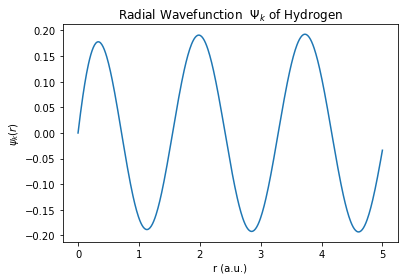

In [5]:
# Ploteo
plt.plot(x,x*psi.real);
plt.title("Radial Wavefunction  $\Psi_{k}$ of Hydrogen");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");

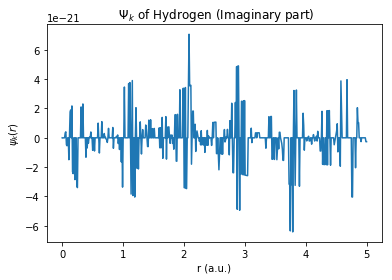

In [6]:
plt.plot(x,x*psi.imag);
plt.title(" $\Psi_{k}$ of Hydrogen (Imaginary part)");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");

#  Ejercicios


* Elegir un ion hidrogénico y generar algunas funciones del continuo por diagonalización.
* Generar las funciones analíticas que corresponden a las energías que se obtuvieron diagonalizando.
* Dibujar las funciones y compararlas.


In [13]:
from numpy import identity 

def Laplacian(x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    M = -2*identity(n,'d')
    for i in range(1,n):
        M[i,i-1] = M[i-1,i] = 1
    return M/h**2

In [14]:
from numpy import sqrt

# Normalización de las funciones 

def Normalizate(U,x):
    
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)

        
    for j in range(0,n):
        suma = 0.0
        for i in range(1,n):
             suma = suma + U[i,j]**2

        suma = suma*h
        rnorm = 1/sqrt(suma)
#        print j,' integral (sin normalizar) =',rnorm
       
#       Normalization
        rsign = 1
        if U[1,j] < 0:
            rsign = -1
            
        rnorm = rnorm * rsign
        for i in range(0,n):
            U[i,j] = U[i,j]*rnorm
         
    return  U

In [35]:
from numpy import diag,  linspace, array, arange
from numpy.linalg import eigh
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show

step=0.1
xmin=step
xmax=20
x=arange(xmin,xmax,step)
nsize = len(x)
 
# array defined above
nsize = len(x)
Dx = step

x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])


# Kinetic (T) and Potential (V)
T = -0.5*Laplacian(x)
lq = 4
V =  lq*(lq+1)/(2 * x * x) - 1/x

# Hamiltonian
H =  T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)


# Normalization
U=Normalizate(U,x)

E=: 0.008522385108143312
E=: 0.08027568122551108
E=: 0.17976495361317965
E=: 0.30555608920418126
E=: 0.45698653812904744


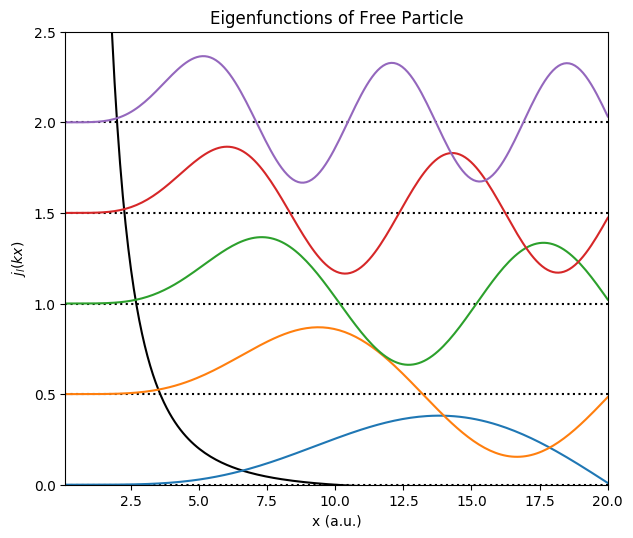

In [36]:
# Plot


#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Number of functions to plot
nfunctions = 5

# Plot the potential
plot(x,V,color='k')

# Plot wavefunctions
ebase=-0.5
for i in range(nfunctions):
    ebase=ebase+0.5
    # For each of the first few solutions, plot the energy level:
    axhline(y=ebase,color='k',ls=":")
    # as well as the eigenfunction, displaced the function 
    # so they don't all pile up on each other:
    plot(x,U[:,i]+ebase)
    print("E=:",E[i])
axis([xmin,xmax,0,2.5])
title("Eigenfunctions of Free Particle")
xlabel("x (a.u.)")
ylabel("$j_l(k x)$")
show()

# Partícula Libre

In [7]:
from numpy import zeros,linspace
import matplotlib.pyplot as plt

nsize=500
xmax=20.0
xmin=0.
x = linspace(xmin,xmax,nsize)
psi = zeros(nsize,dtype=complex)
jl2 =  zeros(nsize)
from __future__ import division

In [8]:
# Funciones de Bessel

import scipy.special as spl 
from numpy import pi,sqrt

def Bessel(k,l,r):
    rho = k*r
    if rho==0.0:
        jl = 0
        if l==0:
            jl=1
        return jl
    
    jl  =  sqrt( pi/(2*rho) ) * spl.jn(l+0.5,rho)
    return jl


In [9]:
# Comparación de la solución Coulombiana con Z=0 y Bessel

k = 2.05627032187
lq = 1

In [10]:
# Asymptotic Normalization

rinf = 10*(lq+1) / k  # kr = 10*l
psiinf = R_analytic(k,lq,0,rinf).evalf()
fjlinf = Bessel(k,lq,rinf)
fnorm = fjlinf/psiinf

In [11]:

for i in range(nsize):
    jl2[i] = Bessel(k,lq,x[i])
    psi[i]= R_analytic(k,lq,0,x[i]).evalf() * fnorm


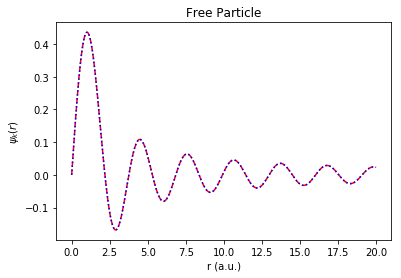

In [12]:
# Ploteo
plt.plot(x,psi.real,color='red',linestyle='dashed');
plt.plot(x,jl2,color='blue',linestyle='dotted')
plt.title("Free Particle");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");